<a href="https://colab.research.google.com/github/thekalyugvasi/Bharat-Intern/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [85]:
# Loading the Dataset
titanic = pd.read_csv('/content/Titanic-Dataset.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
# Reading first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
# Reading last 5 rows
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [88]:
# Showing no. of rows and columns of dataset
titanic.shape

(891, 12)

In [89]:
# checking for columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [90]:
# Checking for data types
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [91]:
# checking for duplicated values
titanic.duplicated().sum()

0

In [92]:
# checking for null values
nv = titanic.isna().sum().sort_values(ascending=False)
nv = nv[nv>0]
nv

Cabin       687
Age         177
Embarked      2
dtype: int64

In [93]:
# Cheecking what percentage column contain missing values
titanic.isnull().sum().sort_values(ascending=False)*100/len(titanic)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [94]:
# Since Cabin Column has more than 75 % null values .So , we will drop this column
titanic.drop(columns = 'Cabin', axis = 1, inplace = True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [95]:
# Filling Null Values in Age column with mean values of age column
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

# filling null values in Embarked Column with mode values of embarked column
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0],inplace=True)

In [96]:
# checking for null values
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [97]:
# Finding no. of unique values in each column of dataset
titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [98]:
titanic['Survived'].unique()

array([0, 1])

In [99]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [100]:
titanic['Pclass'].unique()

array([3, 1, 2])

In [101]:
titanic['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [102]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [103]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [104]:
titanic.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [105]:
# Showing inforamation about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [106]:
# showing info. about numerical columns
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [107]:
# showing info. about categorical columns
titanic.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [108]:
d1 = titanic['Sex'].value_counts()
d1

male      577
female    314
Name: Sex, dtype: int64

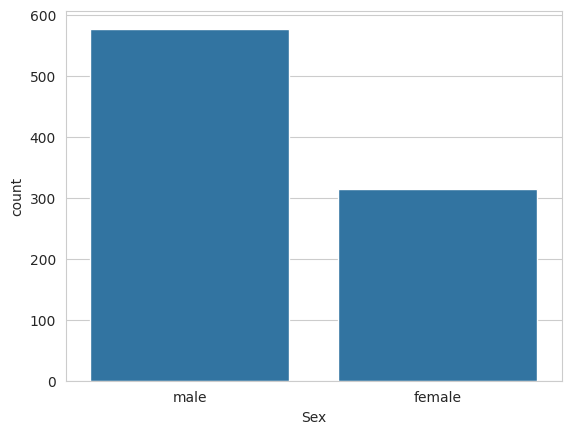

In [109]:
# Plotting Count plot for sex column
sns.countplot(x=titanic['Sex'])
plt.show()

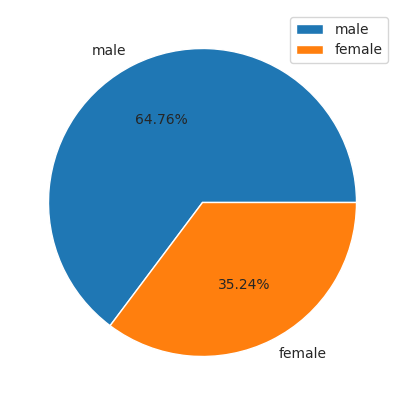

In [110]:
# Plotting Percantage Distribution of Sex Column
plt.figure(figsize=(5,5))
plt.pie(d1.values,labels=d1.index,autopct='%.2f%%')
plt.legend()
plt.show()

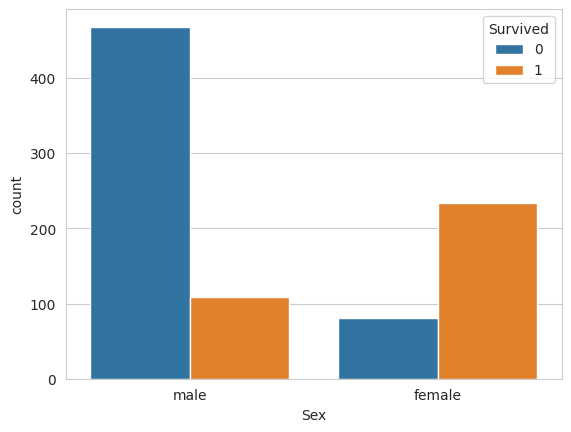

In [111]:
# Showing Distribution of Sex Column Survived Wise
sns.countplot(x=titanic['Sex'],hue=titanic['Survived']) # In Sex (0 represents female and 1 represents male)
plt.show()

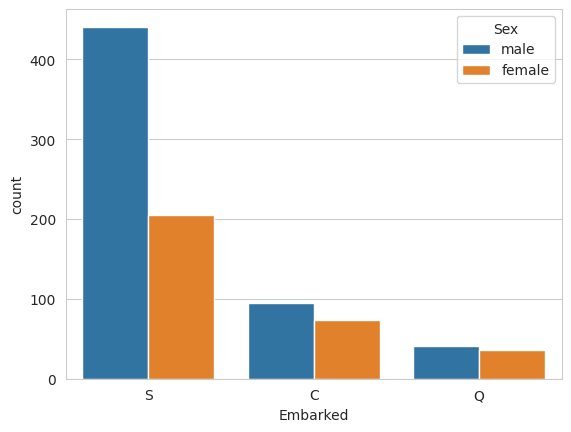

In [112]:
# Showing Distribution of Embarked Sex wise
sns.countplot(x=titanic['Embarked'],hue=titanic['Sex'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

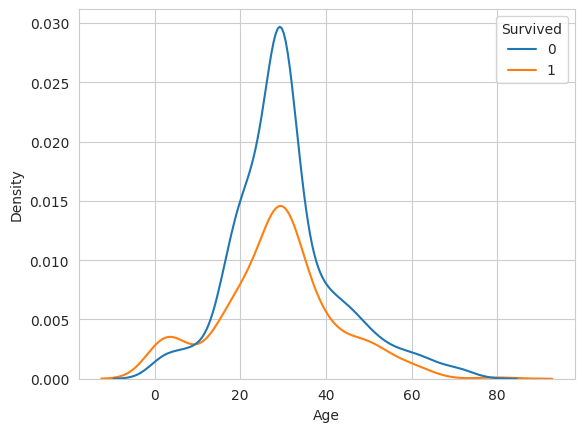

In [113]:
#Showinf Distribution Of Age Survived Wise
sns.kdeplot(x=titanic['Age'],hue=titanic['Survived'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

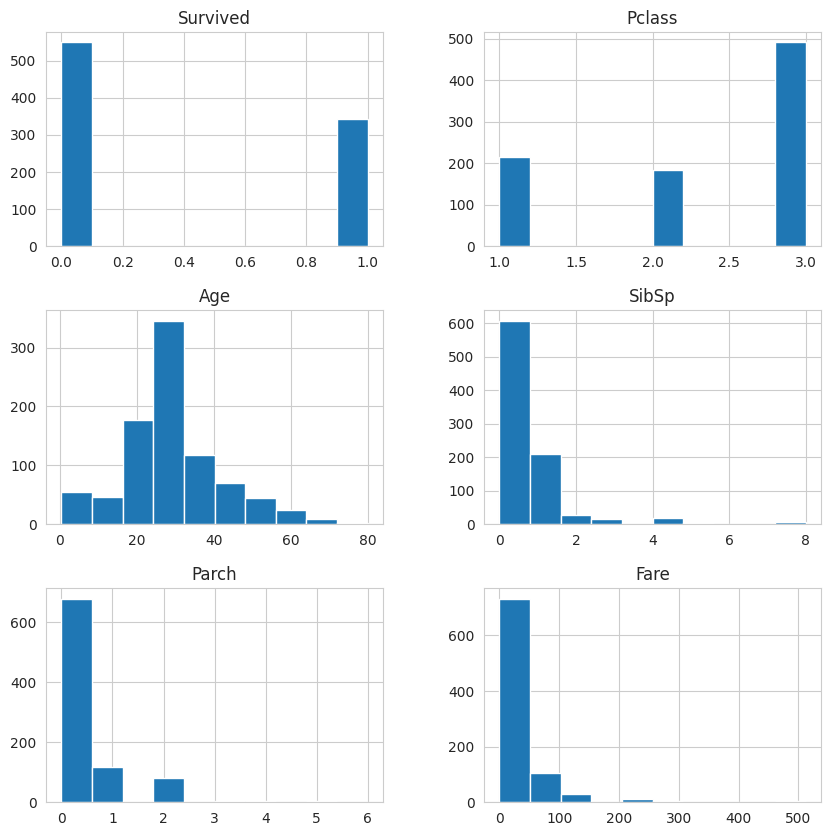

In [114]:
#Plotting Histplot for dataset
titanic.hist(figsize=(10,10))
plt.show

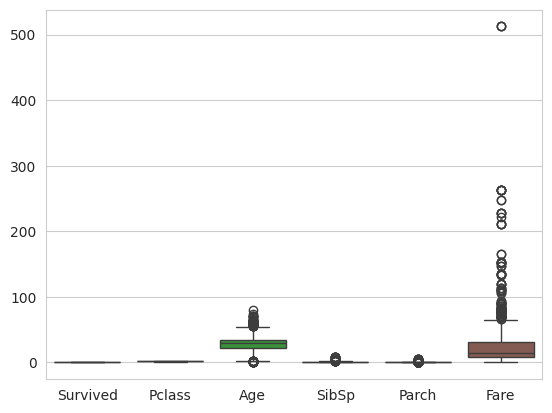

In [115]:
#Plottinng Boxplot For Dataset
#Checking for outliers
sns.boxplot(titanic)
plt.show()

In [116]:
#showing correlation
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


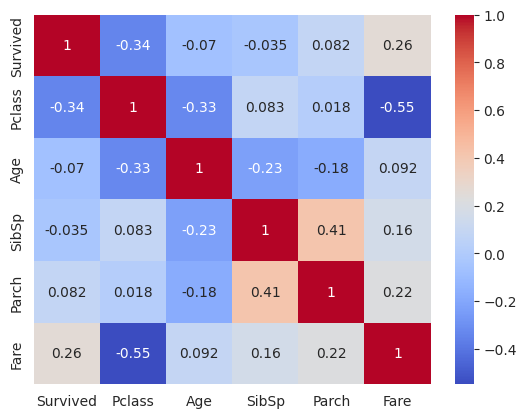

In [117]:
#showing Correlation Plot
sns.heatmap(titanic.corr(),annot=True,cmap='coolwarm')
plt.show()

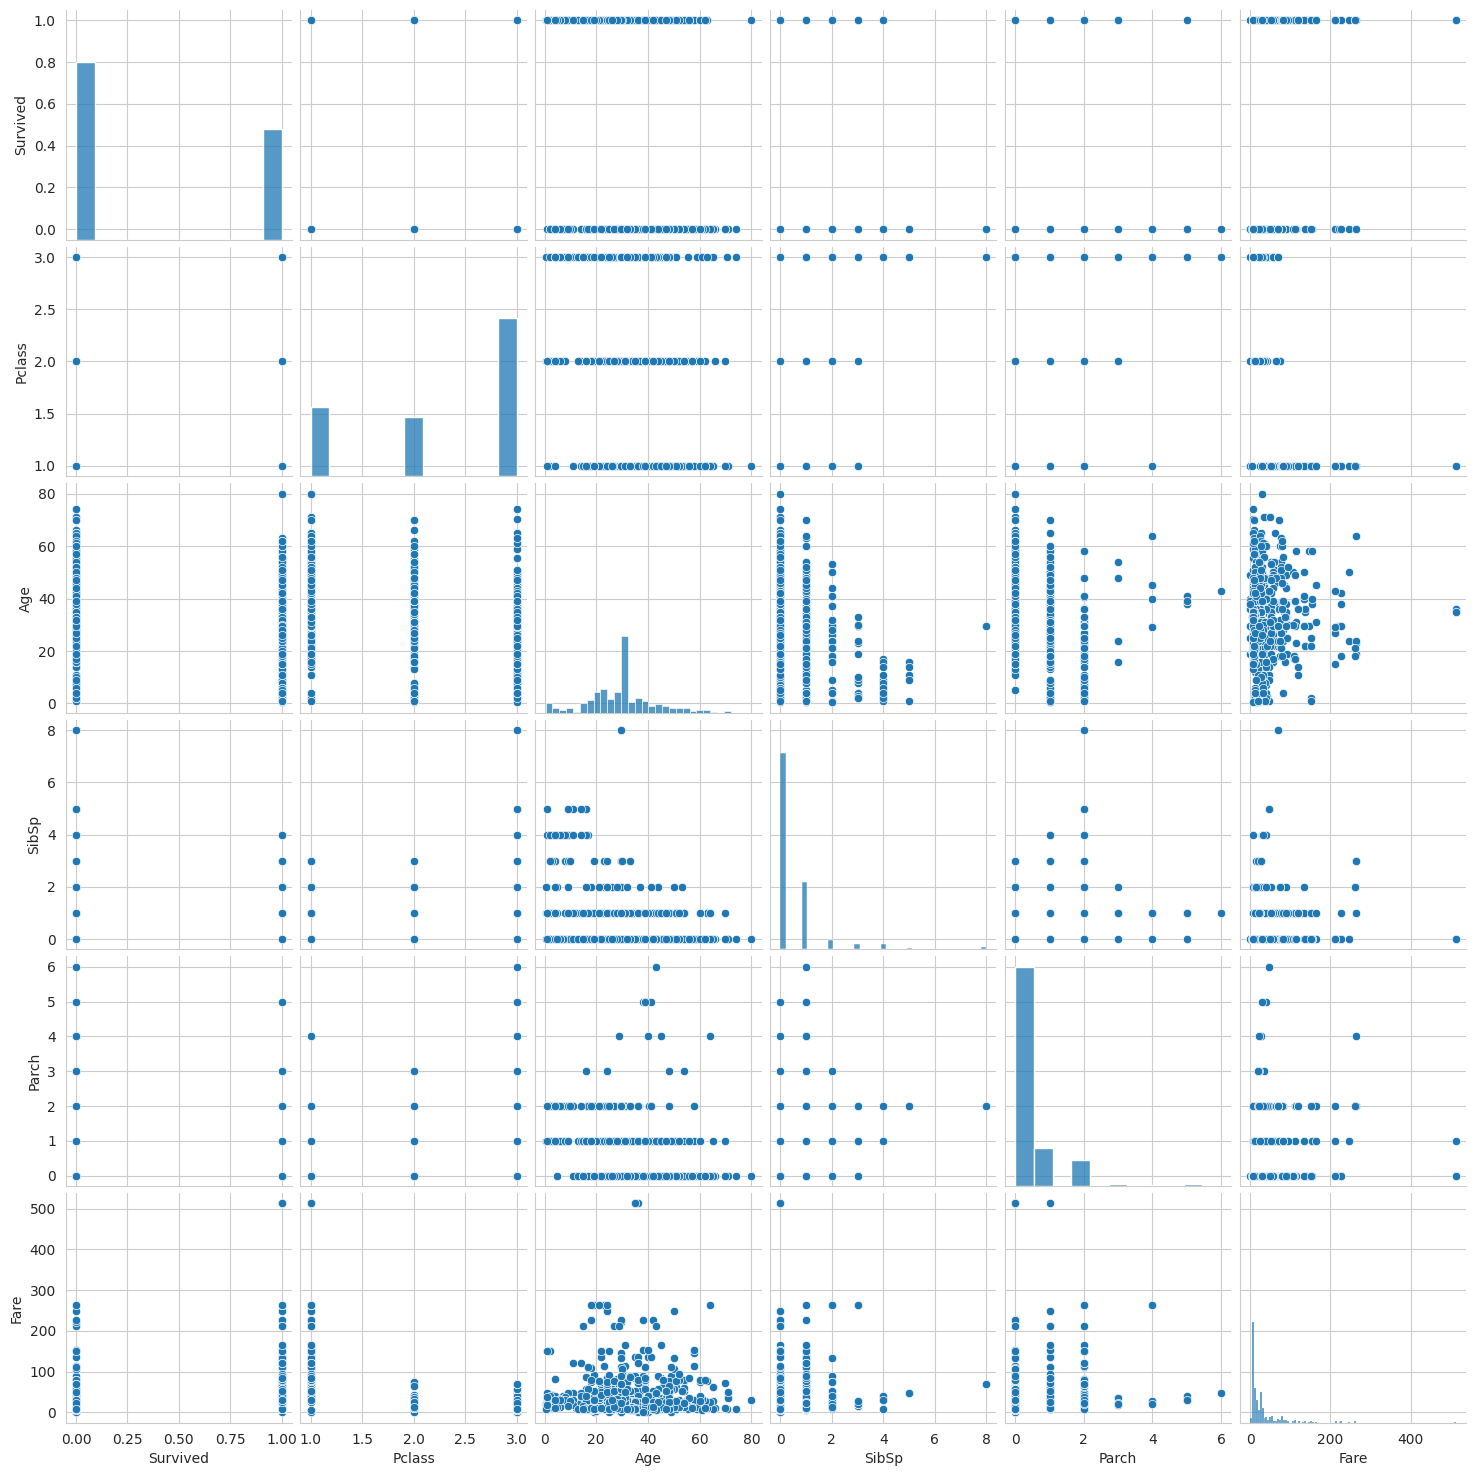

In [118]:
#Plotting pairplot
sns.pairplot(titanic)
plt.show()

In [119]:
#Checking The target Varible
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

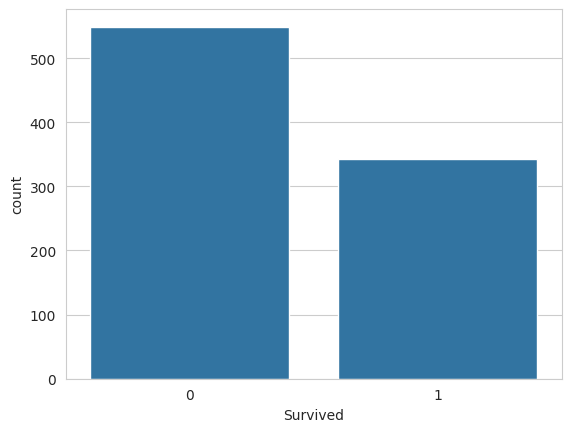

In [120]:
sns.countplot(x=titanic['Survived'])
plt.show()

In [121]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
#create an instance of Label
le = LabelEncoder()
#apply le to each categorical cl
for column in ['Sex','Embarked']:
    titanic[column] = le.fit_transform(titanic[column])

titanic.head()


###Sex Column###
# 0 represents female
# 1 represents male

###Embarked Column ###
# 0 represents C
# 1 represents Q
# 2 represents S

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Data Modelling

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [123]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = titanic[cols]
y = titanic['Survived']
print(x.dtypes)
print(y.dtype)
print(type(x)) #Dataframe
print(type(y)) #Series

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object
int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [124]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [125]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Train_Test_Split

In [126]:
print(891*0.10)

89.10000000000001


In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


Creating Functions to compute Confusion Matrix, Classification Report and to generate Training and the Testing Score(Accuracy)

In [128]:
def cls_eval(ytest,ypred):
  cm = confusion_matrix(ytest,ypred)
  print('Confusion Matrix\n',cm)
  print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
  print('Training Score',model.score(x_train,y_train)) #training
  print('Testing Score',model.score(x_test,y_test))  #testing

1. Logistic Regression

In [129]:
# Building the logistic Regression Model
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [130]:
#Compuuting Training And tesing score
mscore(lr)

Training Score 0.8014981273408239
Testing Score 0.8


In [131]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)

[1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0]


In [132]:
#Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)

Confusion Matrix
 [[47  4]
 [14 25]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        51
           1       0.86      0.64      0.74        39

    accuracy                           0.80        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.81      0.80      0.79        90

Accuracy Score 0.8


2.KNN Classifier Model

In [133]:
# Building The knnclassifier model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [134]:
mscore(knn)

Training Score 0.7590511860174781
Testing Score 0.7555555555555555


In [135]:
#Generating Prediction
ypred_knn = knn.predict(x_test)
print(ypred_knn)

[0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0]


In [136]:
#Evaluate the model - confusion matrix,classification Report,Accuracy Score
cls_eval(y_test,ypred_knn)
acc_knn = accuracy_score(y_test,ypred_knn)
print('Accuracy Score',acc_knn)

Confusion Matrix
 [[48  3]
 [19 20]]
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        51
           1       0.87      0.51      0.65        39

    accuracy                           0.76        90
   macro avg       0.79      0.73      0.73        90
weighted avg       0.78      0.76      0.74        90

Accuracy Score 0.7555555555555555


In [137]:
#building support vector classifier model
svc = SVC(C=1.0)
svc.fit(x_train, y_train)

SVC()

In [138]:
mscore(svc)

Training Score 0.6766541822721598
Testing Score 0.7


In [139]:
#prediction
ypred_svc = svc.predict(x_test)
print(ypred_svc)

[0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0]


In [140]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_svc)
acc_svc = accuracy_score(y_test,ypred_svc)
print('Accuracy Score',acc_svc)

Confusion Matrix
 [[48  3]
 [24 15]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.94      0.78        51
           1       0.83      0.38      0.53        39

    accuracy                           0.70        90
   macro avg       0.75      0.66      0.65        90
weighted avg       0.74      0.70      0.67        90

Accuracy Score 0.7


3. Random Forest Classifier

In [141]:
# Building the RandomForest Classifier Model
rfc=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [142]:
mscore(rfc)

Training Score 0.9126092384519351
Testing Score 0.8333333333333334


In [143]:
#prediction
ypred_rfc = rfc.predict(x_test)
print(ypred_rfc)

[0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0]


In [144]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_rfc)
acc_rfc = accuracy_score(y_test,ypred_rfc)
print('Accuracy Score',acc_rfc)

Confusion Matrix
 [[48  3]
 [12 27]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        51
           1       0.90      0.69      0.78        39

    accuracy                           0.83        90
   macro avg       0.85      0.82      0.82        90
weighted avg       0.84      0.83      0.83        90

Accuracy Score 0.8333333333333334


Decision Classifier

In [145]:
# Building the DecisionTree Classifier Model
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [146]:
mscore(dt)

Training Score 0.8439450686641697
Testing Score 0.8


In [147]:
# Generating Prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0]


In [148]:
# Evaluate the model - confusion matrix, classification Report, Accuracy score
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)

Confusion Matrix
 [[47  4]
 [14 25]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        51
           1       0.86      0.64      0.74        39

    accuracy                           0.80        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.81      0.80      0.79        90

Accuracy Score 0.8


5.Adaboost Classifier

In [149]:
# Builing the Adaboost model
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [150]:
mscore(ada_boost)

Training Score 0.846441947565543
Testing Score 0.8444444444444444


In [151]:
# Generating the predictions
ypred_ada_boost = ada_boost.predict(x_test)

In [152]:
# Evaluate the model - confusion matrix, classification Report, Accuracy Score
cls_eval(y_test,ypred_ada_boost)
acc_adab = accuracy_score(y_test,ypred_ada_boost)
print('Accuracy Score',acc_adab)

Confusion Matrix
 [[48  3]
 [11 28]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        51
           1       0.90      0.72      0.80        39

    accuracy                           0.84        90
   macro avg       0.86      0.83      0.84        90
weighted avg       0.85      0.84      0.84        90

Accuracy Score 0.8444444444444444


In [153]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','knn','SVC','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_knn,acc_svc,acc_rfc,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Ada Boost Classifier,0.844444
3,Random Forest Classifier,0.833333
0,Logistic Regression,0.800000
4,Decision Tree Classifier,0.800000
1,knn,0.755556
2,SVC,0.700000


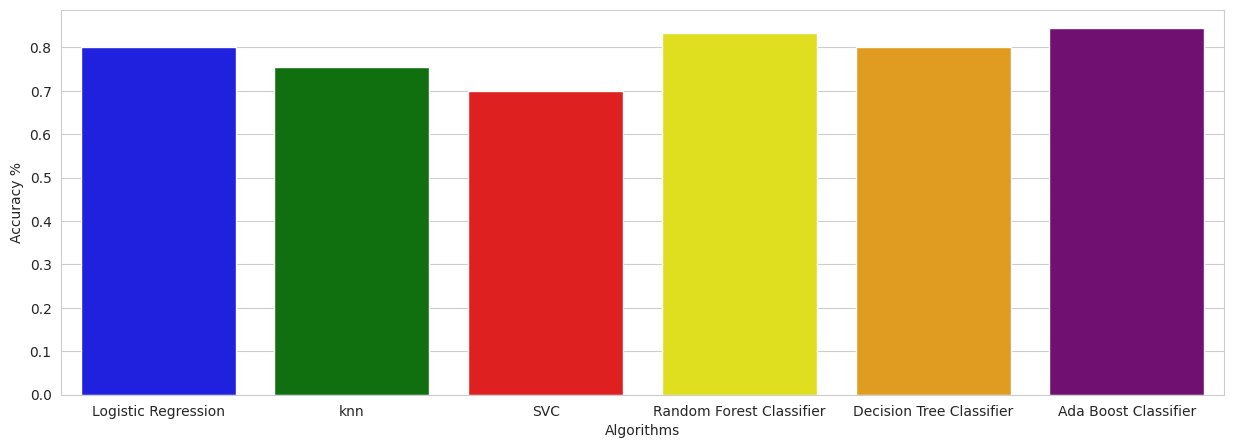

In [154]:
colors = ["blue", "green", "red", "yellow","orange","purple"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()